# Train regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("dataset_labels.csv")

merged_df = pd.merge(features_df, labels_df, on="file")

In [7]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_300", "EQ_600", "EQ_1000"])
y = merged_df[["EQ_300", "EQ_600", "EQ_1000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# === Step 4: Train Model ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# === Step 5: Predict & Evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 14.5552


In [11]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_low_pred", "EQ_mid_pred", "EQ_high_pred"])
pred_df[["EQ_low_true", "EQ_mid_true", "EQ_high_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_low_pred  EQ_mid_pred  EQ_high_pred  EQ_low_true  EQ_mid_true  \
0     2.473638     6.395157     -1.982278          8.6          0.0   
1    -2.583478    -0.429877     -0.899360          0.0          0.0   
2    -2.314169    -3.137710      1.647064          0.0          0.0   
3    -0.761550     0.938747     -2.332638          0.0          0.0   
4    -6.603659    -3.599200     -2.129402          0.0          0.0   

   EQ_high_true  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4          -8.6  


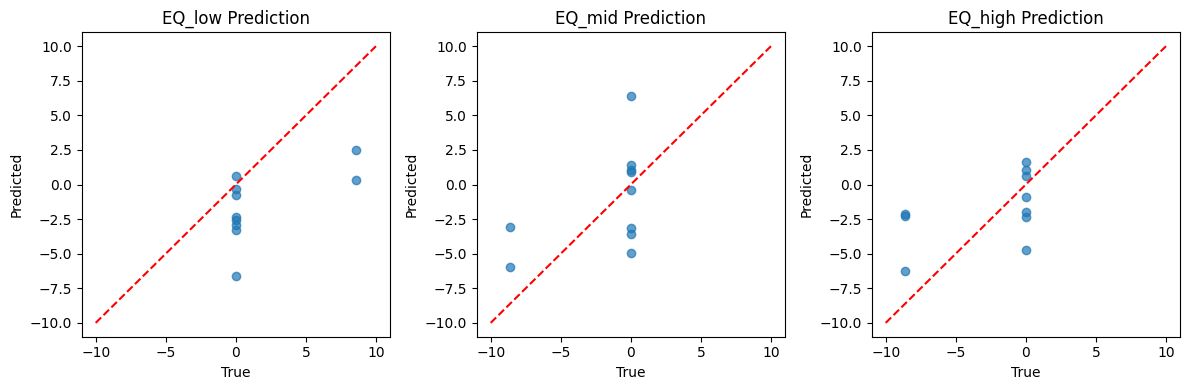

In [12]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_low", "EQ_mid", "EQ_high"]):
    plt.subplot(1, 3, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-10, 10], [-10, 10], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


# Train random forest regressor

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("dataset_labels.csv")

# Merge on filename
merged_df = pd.merge(features_df, labels_df, on="file")

In [5]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_300", "EQ_600", "EQ_1000"])
y = merged_df[["EQ_300", "EQ_600", "EQ_1000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# === Step 4: Train Random Forest Model ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# === Step 5: Predict & Evaluate ===
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest - Mean Squared Error: {mse:.4f}")


Random Forest - Mean Squared Error: 14.8268


In [10]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_300_pred", "EQ_600_pred", "EQ_1000_pred"])
pred_df[["EQ_300_true", "EQ_600_true", "EQ_1000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_300_pred  EQ_600_pred  EQ_1000_pred  EQ_300_true  EQ_600_true  \
0        2.236        1.118         0.000          8.6          0.0   
1       -5.074       -1.634         0.172          0.0          0.0   
2       -0.602       -0.258        -0.086          0.0          0.0   
3       -1.032        1.118         2.494          0.0          0.0   
4       -2.408       -0.344        -2.236          0.0          0.0   

   EQ_1000_true  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4          -8.6  


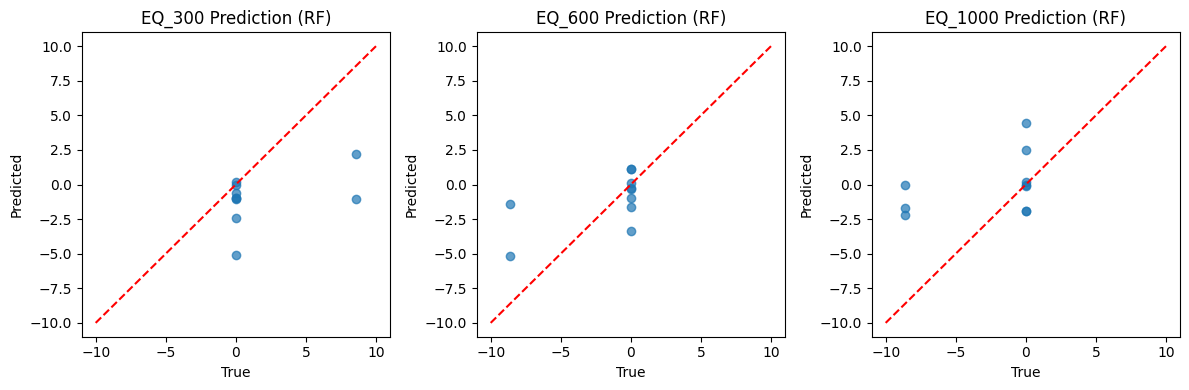

In [12]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_300", "EQ_600", "EQ_1000"]):
    plt.subplot(1, 3, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-10, 10], [-10, 10], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction (RF)")
plt.tight_layout()
plt.show()


# Classifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("classification_labels.csv")

# Merge on file name
df = pd.merge(features_df, labels_df, on="file")

X = df.drop(columns=["file", "label"])
y = df["label"]

In [5]:
# === Step 2: Standardize Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# === Step 4: Train Random Forest Classifier ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# === Step 5: Evaluate ===
y_pred = clf.predict(X_test)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0000    0.0000    0.0000         1
           2     0.0000    0.0000    0.0000         1
           3     0.5000    0.5000    0.5000         2
           4     0.5000    1.0000    0.6667         2
           5     0.0000    0.0000    0.0000         1
           6     0.0000    0.0000    0.0000         2

    accuracy                         0.3000        10
   macro avg     0.1429    0.2143    0.1667        10
weighted avg     0.2000    0.3000    0.2333        10



/Users/vaclis./Documents/project/vtr/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vaclis./Documents/project/vtr/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vaclis./Documents/project/vtr/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

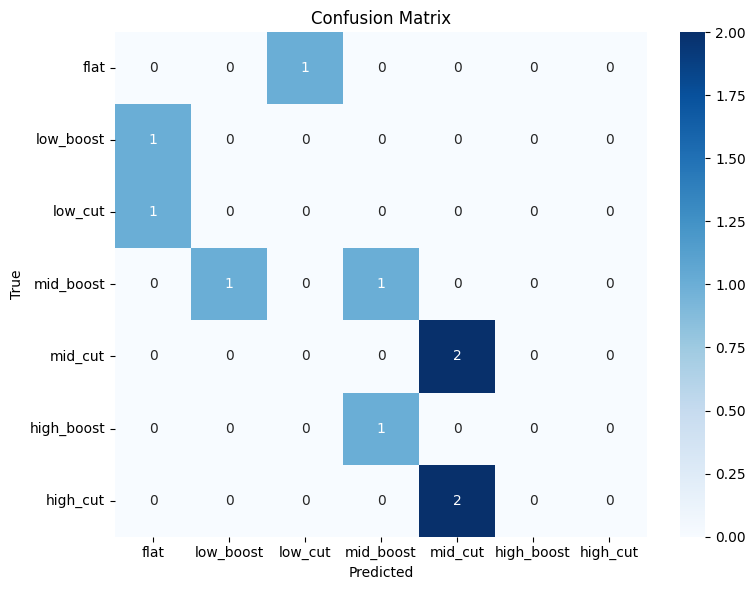

In [10]:
# === Step 6: Confusion Matrix ===
labels = [0,1,2,3,4,5,6]
label_names = ["flat", "low_boost", "low_cut", "mid_boost", "mid_cut", "high_boost", "high_cut"]
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
